In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/content/drive/MyDrive/Data Science Projects/Classification/User_Data.csv'

In [3]:
df = pd.read_csv(path)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
gender = np.array(df['Gender'].unique())
gender

array(['Male', 'Female'], dtype=object)

In [6]:
gender_dict = {key:index for index,key in enumerate(gender,0)}
gender_dict

{'Male': 0, 'Female': 1}

In [7]:
df['Gender'] = df['Gender'].map(gender_dict)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [8]:
X = df[['Age', 'EstimatedSalary']].values.copy()
y = df['Purchased'].values.copy()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

In [13]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [14]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [15]:
from sklearn.metrics import accuracy_score
def model_result(predictions):
  print(f'The accuracy score of the model is {accuracy_score(y_test,predictions)}')

In [16]:
model_result(y_pred)

The accuracy score of the model is 0.775


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_pred, y_test)
cm

array([[67, 21],
       [ 6, 26]])

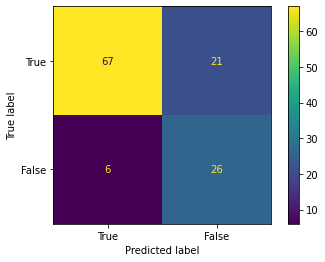

In [18]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True,False])
cm_display.plot()
plt.show()

In [20]:
review = np.array([[0.55, 2000]])
predict = log_model.predict(review)

print(predict)

[1]
